<a href="https://colab.research.google.com/github/AbrahamtheAraiza99/inteligencia-artificial/blob/master/SISTEMAEXPERTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.9 MB/s eta 0:00:00


Velocidad recomendada del ventilador: 84.44


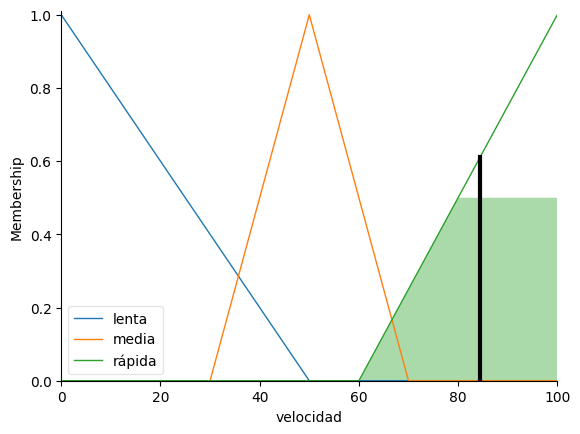

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Paso 1: Definir variables lingüísticas
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 101, 1), 'humedad')
velocidad = ctrl.Consequent(np.arange(0, 101, 1), 'velocidad')

# Paso 2: Definir conjuntos difusos (funciones de membresía)
temperatura['baja'] = fuzz.trimf(temperatura.universe, [0, 0, 20])
temperatura['media'] = fuzz.trimf(temperatura.universe, [15, 25, 35])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [30, 40, 40])

humedad['seca'] = fuzz.trimf(humedad.universe, [0, 0, 50])
humedad['normal'] = fuzz.trimf(humedad.universe, [30, 50, 70])
humedad['húmeda'] = fuzz.trimf(humedad.universe, [60, 100, 100])

velocidad['lenta'] = fuzz.trimf(velocidad.universe, [0, 0, 50])
velocidad['media'] = fuzz.trimf(velocidad.universe, [30, 50, 70])
velocidad['rápida'] = fuzz.trimf(velocidad.universe, [60, 100, 100])

# Paso 3: Definir reglas
regla1 = ctrl.Rule(temperatura['baja'] & humedad['seca'], velocidad['lenta'])
regla2 = ctrl.Rule(temperatura['media'] & humedad['normal'], velocidad['media'])
regla3 = ctrl.Rule(temperatura['alta'] | humedad['húmeda'], velocidad['rápida'])

# Paso 4: Crear sistema de control
sistema_ctrl = ctrl.ControlSystem([regla1, regla2, regla3])
sistema = ctrl.ControlSystemSimulation(sistema_ctrl)

# Paso 5: Entrada de datos
sistema.input['temperatura'] = 30  # Puedes modificar estos valores
sistema.input['humedad'] = 80

# Paso 6: Procesar
sistema.compute()

# Resultado
print(f"Velocidad recomendada del ventilador: {sistema.output['velocidad']:.2f}")
velocidad.view(sim=sistema)
